In [1]:
import numpy as np
import pandas as pd

In [2]:
# Please, to run the experiments donwload the following dataset and put them in the /Datasets folder:
# 	- 3D_spatial_network.txt - 
#       https://archive.ics.uci.edu/ml/machine-learning-databases/00246/3D_spatial_network.txt

filename = "Datasets/3D_spatial_network.txt"
df = pd.read_csv(filename, sep=',', usecols=[1,2,3])
df = df.dropna()

df.columns = ['Longitude', 'Latitude', 'Altitude']
print(list(df.columns.values) )

df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce')

df = df.dropna()

print(df.shape)
print(df.dtypes)

['Longitude', 'Latitude', 'Altitude']
(434873, 3)
Longitude    float64
Latitude     float64
Altitude     float64
dtype: object


In [3]:
x = df[['Longitude','Latitude']]
x = x.to_numpy()
y = df['Altitude']
y = y.to_numpy()

In [4]:
import CaGD_ls

x = np.ascontiguousarray(x)
print(x.shape)
x = CaGD_ls.tens_pow(x,5) 
print(x.shape)

(434873, 2)
(434873, 62)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.999, svd_solver='full')
pca.fit(x_scaled)

x_scaled_pca = pca.transform(x_scaled)

print(np.shape(x_scaled_pca))
pca.explained_variance_ratio_.sum()

(434873, 7)


0.9999999999870592

In [7]:
x_scaled_pca = CaGD_ls.add_bias(x_scaled_pca)
print(np.shape(x_scaled_pca))

(434873, 8)


/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


18.617987672939996

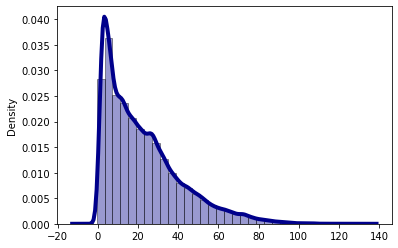

In [8]:
import seaborn as sns

sns.distplot(y, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
y.std()

In [9]:
lr = 1e-3 
block_dim = 2
loss_accepted = 1e-5
max_iter = 5e1
lambda_LASSO = 1e-2
batch_size = 256

n = np.shape(x_scaled_pca)[1]
print("number of parameters ", n)
print("number of points ", x_scaled_pca.shape[0])
theta_0 = np.random.uniform(-1/n**0.5,1/n**0.5,n)
# %run CaGD_ls.py

number of parameters  8
number of points  434873


In [10]:
loss_momBCD_GS,iteration_momBCD_GS,theta_momBCD_GS,t_momBCD_GS = CaGD_ls.mom_BCD_GS_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  853.1092227710537  | time =  0.0035205289999993283
iteration =  1  | loss =  853.1083727335757  | time =  0.03141836700000056
PID parallel:  25095  | process number  0
iteration =  3  | loss =  844.9635439262295  | time =  0.16818691799999996
PID parallel:  25097  | process number  0
iteration =  5  | loss =  830.3185895092561  | time =  0.3118098919999994
PID parallel:  25099  | process number  0
iteration =  7  | loss =  813.0369239342241  | time =  0.44679444600000195
PID parallel:  25101  | process number  0
iteration =  9  | loss =  793.6278996981008  | time =  0.5804731020000027
PID parallel:  25103  | process number  0
iteration =  11  | loss =  771.2057934620594  | time =  0.7177369870000021
PID parallel:  25105  | process number  0
iteration =  13  | loss =  746.1033604136053  | time =  0.8548773840000017
PID parallel:  25107  | process number  0
iteration =  15  | loss =  720.0444651848696  | time =  0.9873381979999998
PID parallel:  25109  | process

In [11]:
loss_randomBCD_GS,iteration_randomBCD_GS,theta_randomBCD_GS,t_randomBCD_GS = CaGD_ls.mom_BCD_random_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  853.1092227710537  | time =  0.0028406160000002956
iteration =  0  | loss =  853.1092227710537  | time =  0.0032725609999992855
PID parallel:  PID parallel: 25146  25147 | process number  PID parallel:   | process number  0 
25148PID parallel: 1   | process number 25149
  2 | process number PID parallel: 
  3PID parallel: 25150
   | process number 25151  4
 | process number  5
iteration =  6  | loss =  850.1818013687523  | time =  0.16516468600000067
PID parallel:  25153PID parallel:   25154 | process number  PID parallel:   | process number  0 
251551 
PID parallel:  | process number PID parallel:    PID parallel: 225156 25157
25158    | process number  | process number  | process number    435


iteration =  12  | loss =  844.9195441940143  | time =  0.34232477000000117
PID parallel:  25160PID parallel:    | process number  PID parallel: 251610  
25162 | process number  PID parallel:  1  | process number 
PID parallel:  251632  
 | process number 25164   | p

In [12]:
loss_BCD_GS,iteration_BCD_GS,theta_BCD_GS,t_BCD_GS = CaGD_ls.BCD_GS_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  853.1092227710537  | time =  0.003557361999998676
iteration =  1  | loss =  853.1083727335757  | time =  0.03845445199999986
PID parallel:  25209  | process number  0
iteration =  3  | loss =  847.4236354571611  | time =  0.17308872299999933
PID parallel:  25211  | process number  0
iteration =  5  | loss =  842.2947198702328  | time =  0.3133940009999989
PID parallel:  25213  | process number  0
iteration =  7  | loss =  837.5576654333782  | time =  0.4460772069999983
PID parallel:  25215  | process number  0
iteration =  9  | loss =  833.0970695393108  | time =  0.5809440369999983
PID parallel:  25217  | process number  0
iteration =  11  | loss =  828.8355002676815  | time =  0.717728564999998
PID parallel:  25219  | process number  0
iteration =  13  | loss =  824.719892628876  | time =  0.8557261909999987
PID parallel:  25221  | process number  0
iteration =  15  | loss =  820.713854823568  | time =  0.9888435579999992
PID parallel:  25223  | process numb

In [13]:
loss_momCA_GS,iteration_momCA_GS,theta_momCA_GS,t_momCA_GS = CaGD_ls.mom_CA_BCD_GS_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  853.1092227710537  | time =  0.0028983840000016414
iteration =  2  | loss =  850.1612753161202  | time =  0.0886237850000029
PID parallel:  25259  | process number  0  | iterations CA =  5
iteration =  4  | loss =  799.8063749454955  | time =  0.29154420900000133
PID parallel:  25261  | process number  0  | iterations CA =  100
iteration =  6  | loss =  351.5722448964641  | time =  0.5252528760000033
PID parallel:  25263  | process number  0  | iterations CA =  8
PID parallel:  25264  | process number  1  | iterations CA =  34
iteration =  8  | loss =  347.3739084617532  | time =  0.7919458160000019
PID parallel:  25266  | process number  0  | iterations CA =  100
iteration =  10  | loss =  342.3920243701274  | time =  1.0322171600000019
PID parallel:  25268  | process number  0PID parallel:    | iterations CA =  25269 14 | process number 
 1  | iterations CA =  22
iteration =  12  | loss =  341.07555398054757  | time =  1.2951924430000012
PID parallel:  25271

In [14]:
loss_momCA_random,iteration_momCA_random,theta_momCA_random,t_momCA_random = CaGD_ls.mom_CA_BCD_random_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.5)

iteration =  0  | loss =  853.1092227710537  | time =  0.0019958519999931923
iteration =  2  | loss =  850.183887169724  | time =  0.053181622999993294
PID parallel:  25316  | process number PID parallel:   025317   | process number  | iterations CA =   12 
 | iterations CA =  100
iteration =  4  | loss =  353.430728793059  | time =  0.272419210999999
PID parallel:  25319 PID parallel:  | process number   253200   | process number  | iterations CA =   16 
 | iterations CA =  13
iteration =  6  | loss =  351.16011530819156  | time =  0.47068282199999345
PID parallel:  25323  | process number  1  | iterations CA = PID parallel:  1 
25322  | process number  0  | iterations CA =  4
iteration =  8  | loss =  350.9071208864931  | time =  0.6712378389999998
PID parallel:  25326PID parallel:    | process number  25325 1 | process number   | iterations CA =   01 
 | iterations CA =  18
iteration =  10  | loss =  349.07018574286235  | time =  0.8769091419999953
PID parallel: PID parallel:   2532

In [15]:
loss_CABCD_stand_GS,iteration_CABCD_stand_GS,theta_CABCD_stand_GS,t_CABCD_stand_GS = CaGD_ls.CA_BCD_GS_ls(
                             x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  853.1092227710537  | time =  0.003258563999999353
iteration =  2  | loss =  850.1612753161202  | time =  0.07316244799999794
PID parallel:  25392  | process number  0  | iterations CA =  100
iteration =  4  | loss =  680.4726726897544  | time =  0.27718885999999543
PID parallel:  25394  | process number  0  | iterations CA =  100
iteration =  6  | loss =  569.4172340531  | time =  0.48874642099999477
PID parallel:  25396  | process number  0  | iterations CA =  100
iteration =  8  | loss =  494.4489124664711  | time =  0.7052925630000004
PID parallel:  25398  | process number  0  | iterations CA =  100
iteration =  10  | loss =  443.7203450363104  | time =  0.942503189
PID parallel:  25400  | process number  0  | iterations CA =  100
iteration =  12  | loss =  410.0987436365318  | time =  1.1677016599999988
PID parallel:  25402  | process number  0  | iterations CA =  100
iteration =  14  | loss =  386.8294254502509  | time =  1.385487206999997
PID parallel:  

In [16]:
loss_ADAM,iteration_ADAM,theta_ADAM,t_ADAM = CaGD_ls.ADAM_ls(x_scaled_pca,y,theta_0,lambda_LASSO,batch_size,lr,loss_accepted,max_iter)

iteration =  0  | loss =  853.1092227710537  | time =  0.003668968999996025
iteration =  1  | loss =  788.0176325126484  | time =  0.12245295999999684
iteration =  2  | loss =  725.8891162108099  | time =  0.217561357000001
iteration =  3  | loss =  668.1312171259659  | time =  0.31472800299999903
iteration =  4  | loss =  615.9362415024679  | time =  0.41274808600000057
iteration =  5  | loss =  569.2800259630784  | time =  0.5083687559999959
iteration =  6  | loss =  528.3936356546517  | time =  0.6018599450000011
iteration =  7  | loss =  493.3455387917007  | time =  0.6950212300000018
iteration =  8  | loss =  464.75959474049654  | time =  0.7970755199999999
iteration =  9  | loss =  442.5909625711744  | time =  0.8911477959999985
iteration =  10  | loss =  428.2795719652026  | time =  0.9869378009999963
iteration =  11  | loss =  421.5974046650451  | time =  1.097564693999999
iteration =  12  | loss =  419.86021521338523  | time =  1.1970155399999953
iteration =  13  | loss =  419

In [17]:
lr = 1e-6
loss_SAG,iteration_SAG,theta_SAG,t_SAG = CaGD_ls.SAG_ls(x_scaled_pca,y,theta_0,lambda_LASSO,batch_size,lr,loss_accepted,max_iter)

iteration =  0  | loss =  853.1092227710537  | time =  0.010357220999999583
iteration =  1  | loss =  848.2013385009049  | time =  0.16770287199999956
iteration =  2  | loss =  843.6721950433302  | time =  0.3590742700000007
iteration =  3  | loss =  839.4914651349926  | time =  0.554534314999998
iteration =  4  | loss =  835.5613717919045  | time =  0.7489140010000028
iteration =  5  | loss =  831.7959998184899  | time =  0.942462919999997
iteration =  6  | loss =  828.1759581842297  | time =  1.1370501500000003
iteration =  7  | loss =  824.6666217393077  | time =  1.331366226
iteration =  8  | loss =  821.2331493710475  | time =  1.525109483999998
iteration =  9  | loss =  817.8653916006805  | time =  1.7198920209999997
iteration =  10  | loss =  814.5478036855125  | time =  1.9133603719999996
iteration =  11  | loss =  811.273455092701  | time =  2.108732531000001
iteration =  12  | loss =  808.0370866937076  | time =  2.315745880999998
iteration =  13  | loss =  804.8344844068836 

In [18]:
print("loss min mom GS CA = ", min(loss_momCA_GS))
print("loss min mom random CA = ", min(loss_momCA_random))
print("loss min standard GS CA = ", min(loss_CABCD_stand_GS))
print("loss min ADAM = ", min(loss_ADAM))
print("loss min SAG = ", min(loss_SAG))

loss min mom GS CA =  337.70583959993417
loss min mom random CA =  337.80246966454865
loss min standard GS CA =  337.98161851268196
loss min ADAM =  418.48459333954264
loss min SAG =  699.1404544717956


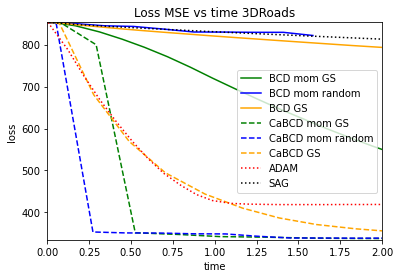

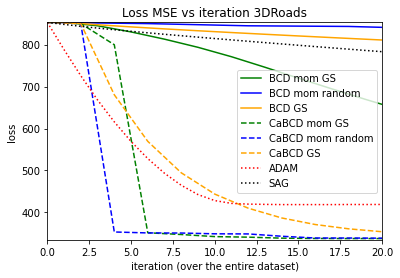

In [19]:
from matplotlib import pyplot as plt
# plt.rcParams.update({'font.size': 10})

plt.plot(t_momBCD_GS, loss_momBCD_GS, label="BCD mom GS", color='green')
plt.plot(t_randomBCD_GS, loss_randomBCD_GS, label="BCD mom random", color='blue')
plt.plot(t_BCD_GS, loss_BCD_GS, label="BCD GS", color='orange')
plt.plot(t_momCA_GS, loss_momCA_GS, label="CaBCD mom GS", linestyle='--', color='green')
plt.plot(t_momCA_random, loss_momCA_random, label="CaBCD mom random", linestyle='--', color='blue')
plt.plot(t_CABCD_stand_GS, loss_CABCD_stand_GS, label="CaBCD GS", linestyle='--', color='orange')
plt.plot(t_ADAM, loss_ADAM, label="ADAM", linestyle=':', color='red')
plt.plot(t_SAG, loss_SAG, label="SAG", linestyle=':', color='black')
plt.legend(loc = "right")
plt.title('Loss MSE vs time 3DRoads')
plt.xlabel('time')
plt.ylabel('loss')

plt.xlim([0,2])
plt.ylim([min(loss_ADAM)*0.8,max(loss_ADAM)])
# plt.savefig('CaBCD_vs_all_time_3DRoads.pdf', bbox_inches='tight')
plt.show()

plt.plot(iteration_momBCD_GS, loss_momBCD_GS, label="BCD mom GS", color='green')
plt.plot(iteration_randomBCD_GS, loss_randomBCD_GS, label="BCD mom random", color='blue')
plt.plot(iteration_BCD_GS, loss_BCD_GS, label="BCD GS", color='orange')
plt.plot(iteration_momCA_GS, loss_momCA_GS, label="CaBCD mom GS", linestyle='--', color='green')
plt.plot(iteration_momCA_random, loss_momCA_random, label="CaBCD mom random", linestyle='--', color='blue')
plt.plot(iteration_CABCD_stand_GS, loss_CABCD_stand_GS, label="CaBCD GS", linestyle='--', color='orange')
plt.plot(iteration_ADAM, loss_ADAM, label="ADAM", linestyle=':', color='red')
plt.plot(iteration_SAG, loss_SAG, label="SAG", linestyle=':', color='black')
plt.legend(loc = "right")
plt.title('Loss MSE vs iteration 3DRoads')
plt.xlabel('iteration (over the entire dataset)')
plt.ylabel('loss')
plt.xlim([0,20])
plt.ylim([min(loss_ADAM)*0.8,max(loss_ADAM)])
# plt.savefig('CaBCD_vs_all_iteration_3DRoads.pdf', bbox_inches='tight')
plt.show()